In [0]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/chest x_ray','r') as ref_file:
  ref_file.extractall("")

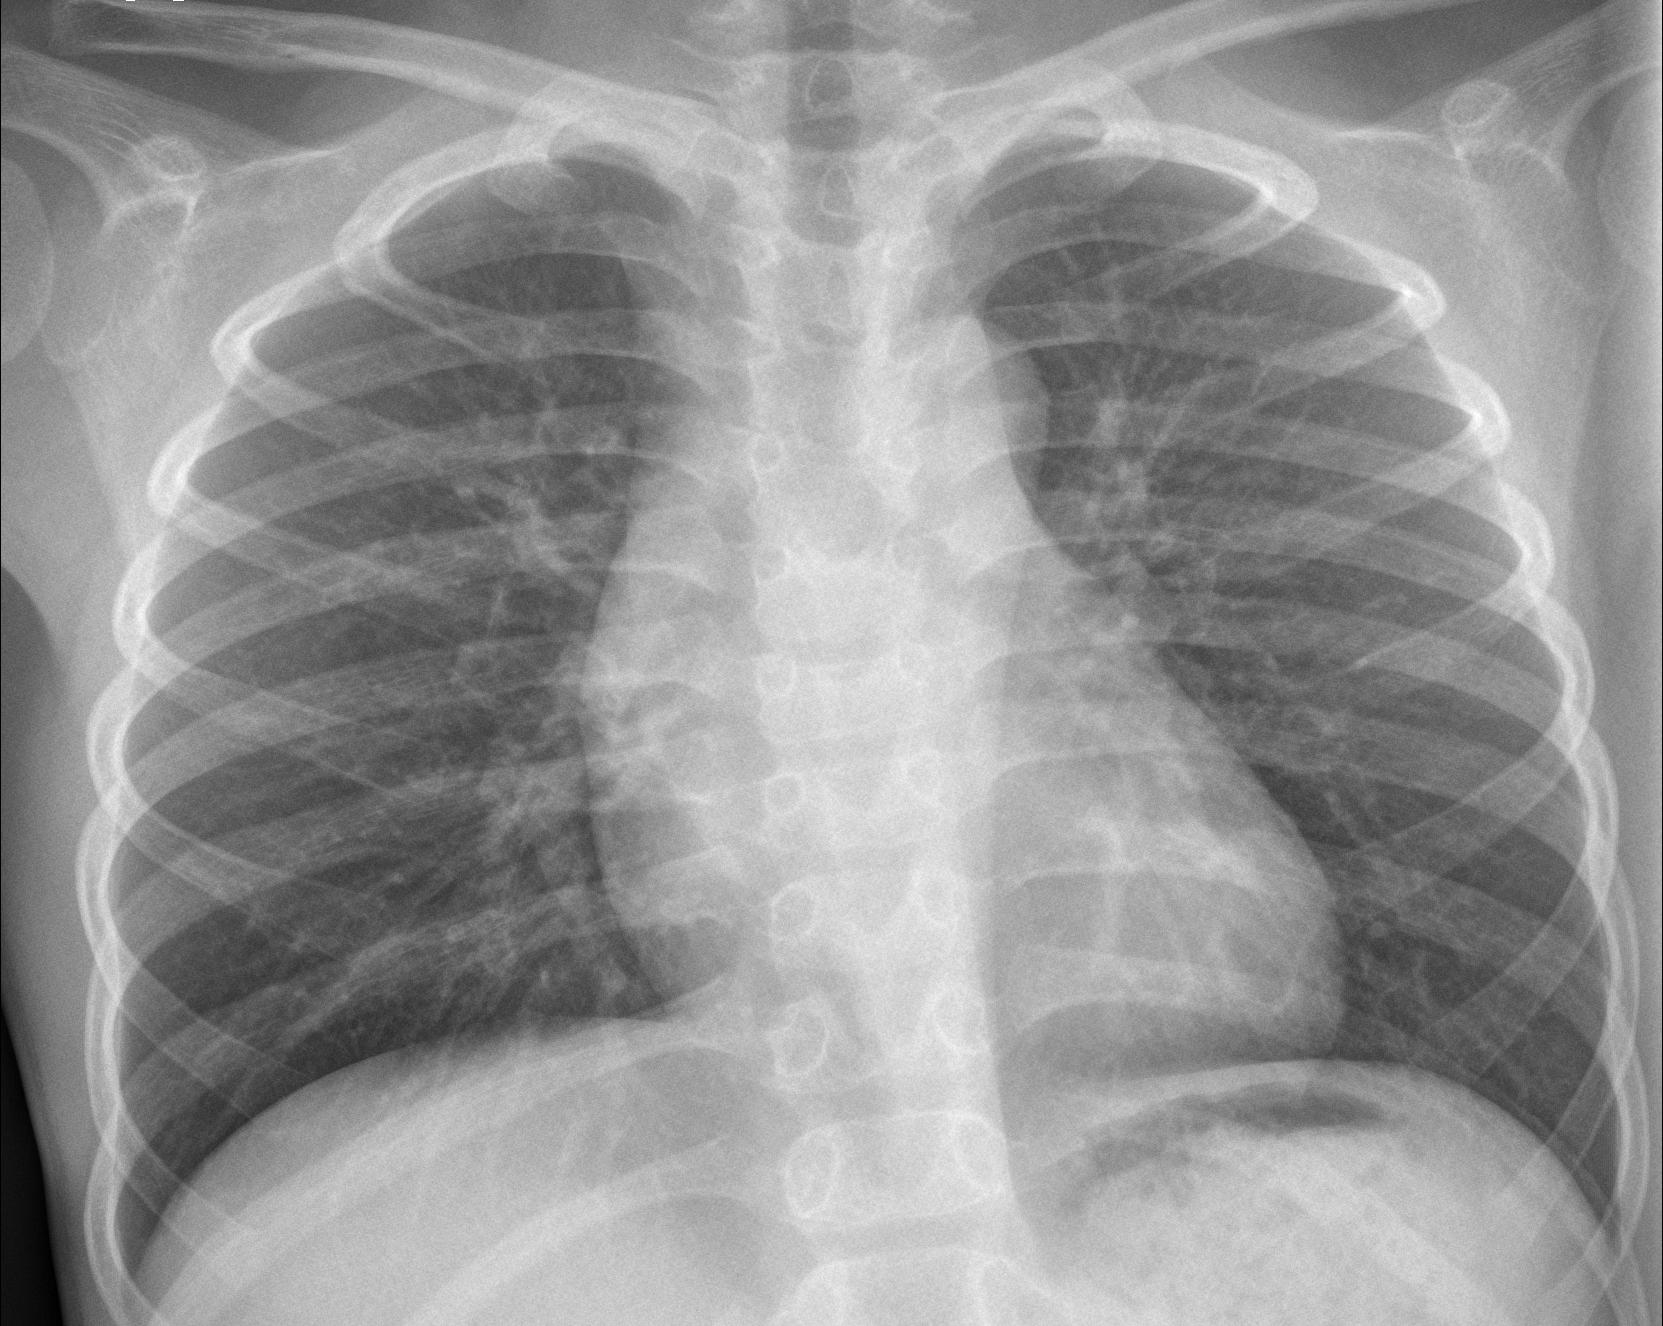

In [2]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/chest_xray/test/NORMAL/IM-0006-0001.jpeg")
window_name = 'img' 
cv2_imshow(img)

In [0]:
import os
image_names = os.listdir("/content/chest_xray/train/NORMAL")

In [0]:
x_train = []
y_train = []
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/chest_xray/train/NORMAL/" + image_names[i])
    img = cv2.resize(img,(256,256))
    x_train.append(img)
    y_train.append(0)
  except:
    pass

In [0]:
image_names = os.listdir("/content/chest_xray/train/PNEUMONIA")

In [0]:
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/chest_xray/train/PNEUMONIA/" + image_names[i])
    img = cv2.resize(img,(256,256))
    x_train.append(img)
    y_train.append(1)
  except:
    pass

In [0]:
x_test = []
y_test =[]
image_names = os.listdir("/content/chest_xray/test/NORMAL")
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/chest_xray/test/NORMAL/" + image_names[i])
    img = cv2.resize(img,(256,256))
    x_test.append(img)
    y_test.append(0)
  except:
    pass

In [0]:
image_names = os.listdir("/content/chest_xray/test/PNEUMONIA")
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/chest_xray/test/PNEUMONIA/" + image_names[i])
    img = cv2.resize(img,(256,256))
    x_test.append(img)
    y_test.append(1)
  except:
    pass

In [0]:
import numpy as np

In [0]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [0]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
import numpy as np
np.unique(y_train)

array([0, 1])

In [13]:
x_train.shape

(5216, 256, 256, 3)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                16516128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 16,517,057
Trainable params: 16,517,057
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train,batch_size=50,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
105/105 [==============================] - 11s 104ms/step - loss: 316.5295 - accuracy: 0.7897 - val_loss: 16.0980 - val_accuracy: 0.7532
Epoch 2/10
105/105 [==============================] - 10s 100ms/step - loss: 1.1765 - accuracy: 0.9538 - val_loss: 8.6129 - val_accuracy: 0.7885
Epoch 3/10
105/105 [==============================] - 10s 100ms/step - loss: 16.0082 - accuracy: 0.9151 - val_loss: 17.1362 - val_accuracy: 0.7292
Epoch 4/10
105/105 [==============================] - 10s 99ms/step - loss: 0.6800 - accuracy: 0.9647 - val_loss: 12.3026 - val_accuracy: 0.7628
Epoch 5/10
105/105 [==============================] - 10s 99ms/step - loss: 0.2435 - accuracy: 0.9831 - val_loss: 11.9811 - val_accuracy: 0.7644
Epoch 6/10
105/105 [==============================] - 10s 99ms/step - loss: 0.1461 - accuracy: 0.9885 - val_loss: 11.1266 - val_accuracy: 0.7660
Epoch 7/10
105/105 [==============================] - 10s 99ms/step - loss: 0.1542 - accuracy: 0.9868 - val_loss: 11.5971 - v